In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for training with normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15          # 15% of training data for validation
)

# Define ImageDataGenerator for testing with normalization
test_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    validation_split=0.15          # 15% of testing data for validation
)

In [52]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [53]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(
    combined_dataset,
    output_dir,
    test_size=0.15,
    random_state=42,
    animal_categories=['cat_v1', 'dog_v1', 'cattle']
):
    # """
    # Splits the dataset into training and testing sets.

    # Parameters:
    # - combined_dataset_path: Path to the combined dataset.
    # - output_dir: Path where 'train' and 'test' directories will be created.
    # - test_size: Proportion of the dataset to include in the test split.
    # - random_state: Controls the shuffling applied to the data before splitting.
    # - animal_categories: List of main categories in the dataset.
    # """
    
    # Define paths for train and test directories
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    
    # Create train and test directories
    for directory in [train_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(f"Created directory: {directory}")
    
    # Iterate through each category and breed
    for category in animal_categories:
        category_path = os.path.join(combined_dataset, category)
        if not os.path.isdir(category_path):
            print(f"Warning: Category '{category}' does not exist in the dataset.")
            continue
        
        breeds = os.listdir(category_path)
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                print(f"Skipping non-directory file: {breed_path}")
                continue
            
            # List all image files in the breed directory
            image_files = [
                f for f in os.listdir(breed_path)
                if os.path.isfile(os.path.join(breed_path, f)) and
                f.lower().endswith(('.jpg', '.jpeg'))
            ]
            
            if not image_files:
                print(f"No images found in {breed_path}. Skipping...")
                continue
            
            # Split the image files into train and test
            train_files, test_files = train_test_split(
                image_files,
                test_size=test_size,
                random_state=random_state,
                shuffle=True
            )
            
            # Define destination paths
            train_breed_path = os.path.join(train_dir, category, breed)
            test_breed_path = os.path.join(test_dir, category, breed)
            
            # Create breed directories in train and test
            for path in [train_breed_path, test_breed_path]:
                os.makedirs(path, exist_ok=True)
            
            # Copy train images
            for img in train_files:
                src = os.path.join(breed_path, img)
                dst = os.path.join(train_breed_path, img)
                shutil.copy2(src, dst)  # copy2 preserves metadata
            print(f"Copied {len(train_files)} images to {train_breed_path}")
            
            # Copy test images
            for img in test_files:
                src = os.path.join(breed_path, img)
                dst = os.path.join(test_breed_path, img)
                shutil.copy2(src, dst)
            print(f"Copied {len(test_files)} images to {test_breed_path}")

    print("Dataset splitting completed successfully.")

if __name__ == "__main__":
    combined_dataset = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/combinedData'  # Replace with your path
    output_dir = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed'           # Replace with your desired output path
    
    split_dataset(
        combined_dataset=combined_dataset,
        output_dir=output_dir,
        test_size=0.15,
        random_state=42,
        animal_categories=['cat_v1', 'dog_v1', 'cattle']
    )


Copied 425 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\train\cat_v1\bengal
Copied 75 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\test\cat_v1\bengal
Copied 425 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\train\cat_v1\domestic_shorthair
Copied 75 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\test\cat_v1\domestic_shorthair
Copied 426 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\train\cat_v1\maine_coon
Copied 76 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\test\cat_v1\maine_coon
Copied 425 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\train\cat_v1\ragdoll
Copied 75 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\test\cat_v1\ragdoll
Copied 424 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\train\cat_v1\siamese
Copied 75 images to D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed\test\cat_v1\siamese
Copied 425 images to D:/

In [35]:
# Paths 
combined_dataset_path = "D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/combinedData"    # Replace with your path
output_split_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed'             # Replace with your path

# Assuming you have already split the dataset into 'train' and 'test' directories
train_directory = os.path.join(output_split_path, 'train')
test_directory = os.path.join(output_split_path, 'test')

# Create Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),         # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training',              # Set as training data
    shuffle=True,
    seed=42
)

# Create Validation Generator from Training Data
validation_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',            # Set as validation data
    shuffle=True,
    seed=42
)

# Create Testing Generator
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5430 images belonging to 15 classes.
Found 945 images belonging to 15 classes.
Found 1126 images belonging to 11 classes.


In [55]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Paths to training and testing data
train_directory = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/train'
test_directory = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to prevent updating its weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)  # Flatten the output of the convolutional base
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 units
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer with softmax activation

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 5430 images belonging to 15 classes.
Found 945 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [56]:
# Print the model summary
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,567,951 (105.16 MB)

 Trainable params: 12,853,263 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [57]:
# # Callbacks
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint(
#     'best_vgg16_animal_classification.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min',
#     verbose=1
# )

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     mode='min',
#     verbose=1
# )



# for 10 epoch

In [14]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early_stop],
    verbose=1
)


Epoch 1/10


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7504 - loss: 0.6073
Epoch 1: val_loss improved from inf to 0.32268, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 432s 3s/step - accuracy: 0.7510 - loss: 0.6059 - val_accuracy: 0.8637 - val_loss: 0.3227
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9271 - loss: 0.1978
Epoch 2: val_loss improved from 0.32268 to 0.24172, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 590s 3s/step - accuracy: 0.9271 - loss: 0.1977 - val_accuracy: 0.9025 - val_loss: 0.2417
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9409 - loss: 0.1759
Epoch 3: val_loss improved from 0.24172 to 0.21326, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 624s 4s/step - accuracy: 0.9409 - loss: 0.1759 - val_accuracy: 0.9193 - val_loss: 0.2133
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9410 - loss: 0.1619


In [7]:
# Train the model
history2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop],
    verbose=1
)


Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4983 - loss: 1.7493
Epoch 1: val_loss improved from inf to 2.02883, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.4992 - loss: 1.7462 - val_accuracy: 0.3608 - val_loss: 2.0288
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7826 - loss: 0.7660
Epoch 2: val_loss improved from 2.02883 to 1.71491, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.7826 - loss: 0.7656 - val_accuracy: 0.4307 - val_loss: 1.7149
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8122 - loss: 0.6174
Epoch 3: val_loss improved from 1.71491 to 1.62023, saving model to best_vgg16_animal_classification.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.8122 - loss: 0.6172 - val_accuracy: 0.4656 - val_loss: 1.6202
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8383 - loss: 0.5345


In [21]:
!pip install tensorflow==2.17.0

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 660.6 kB/s eta 0:09:43
   ---------------------------------------- 0.1/385.2 MB 465.5 kB/s eta 0:13:48
   ---------------------------------------- 0.1/385.2 MB 655.4 kB/s eta 0:09:48
   ---------------------------------------- 0.1/385.2 MB 655.8 kB/s eta 0:09:48
   ---------------------------------------- 0.2/385.2 MB 827.9 kB/s eta 0:07:45
   ---------------------------------------- 0.3/385.2 MB 965.4 kB/s eta 0:06:39
   ---------------------------------------- 0.5/385.2 MB 1.3 MB/s eta 0:04:48
   ---------------------------------------- 0.6/385.2 MB 1.5 MB/s eta 0:04:09
   ---------------------------------------- 0.8/385.2 MB 1.9 MB/s eta 0:03:21
   ---------------------------------------- 1.1/385.2 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 1.4/385.2 MB 2.6 MB/s 

In [22]:
!python --version



Python 3.12.3


In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8468 - loss: 0.4359
Test Accuracy: 0.8499


In [13]:

# Save the final model
model.save('vgg16_animal_classification_final.h5')

36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step


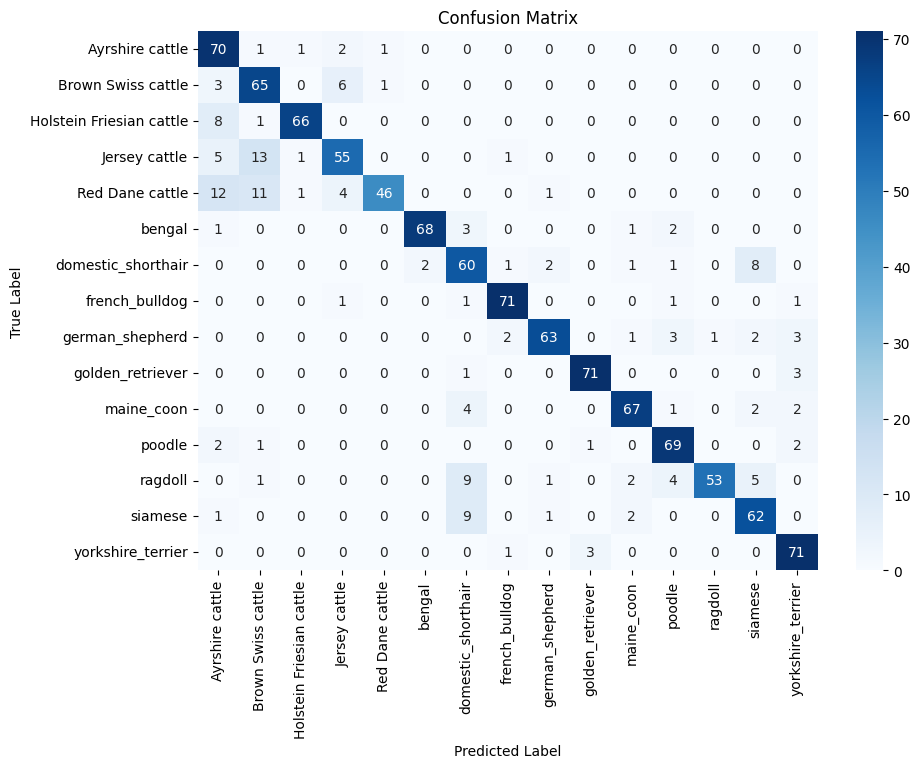

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  # Import necessary functions

# Generate Predictions
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
# print("Confusion Matrix:")
# print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [19]:

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

Classification Report:
                          precision    recall  f1-score   support

         Ayrshire cattle       0.69      0.93      0.79        75
      Brown Swiss cattle       0.70      0.87      0.77        75
Holstein Friesian cattle       0.96      0.88      0.92        75
           Jersey cattle       0.81      0.73      0.77        75
         Red Dane cattle       0.96      0.61      0.75        75
                  bengal       0.97      0.91      0.94        75
      domestic_shorthair       0.69      0.80      0.74        75
          french_bulldog       0.93      0.95      0.94        75
         german_shepherd       0.93      0.84      0.88        75
        golden_retriever       0.95      0.95      0.95        75
              maine_coon       0.91      0.88      0.89        76
                  poodle       0.85      0.92      0.88        75
                 ragdoll       0.98      0.71      0.82        75
                 siamese       0.78      0.83      0

In [10]:
# import matplotlib.pyplot as plt
# import pickle

# # If you have saved the model using model.save()
# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('best_vgg16_animal_classification.keras')

# # Load the history object if it was saved as a pickle file
# with open('history.pkl', 'rb') as file:
#     history = pickle.load(file)


In [20]:
tf.__version__

'2.17.0'

In [8]:
################30 EPOCH
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8875 - loss: 0.3573
Test Accuracy: 0.8854


In [26]:
# Save the final model
model.save('vgg16_animal_classification_final2.h5')

In [11]:
from tensorflow.keras.models import load_model

# Load the model
model2 = load_model('vgg16_animal_classification_final2.h5')  # or 'best_model.h5' if saved in h5 format


In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test_generator, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8855 - loss: 0.3515
Test Loss: 0.3817875385284424
Test Accuracy: 0.875666081905365


In [32]:
# import numpy as np
# from sklearn.metrics import classification_report, confusion_matrix

# # Generate predictions
# predictions = model2.predict(test_generator, verbose=1)
# predicted_classes = np.argmax(predictions, axis=1)

# # Get true labels
# true_classes = test_generator.classes
# class_labels = list(test_generator.class_indices.keys())

# # Print Confusion Matrix
# conf_matrix = confusion_matrix(true_classes, predicted_classes)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Print Classification Report
# class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
# print("Classification Report:")
# print(class_report)


36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


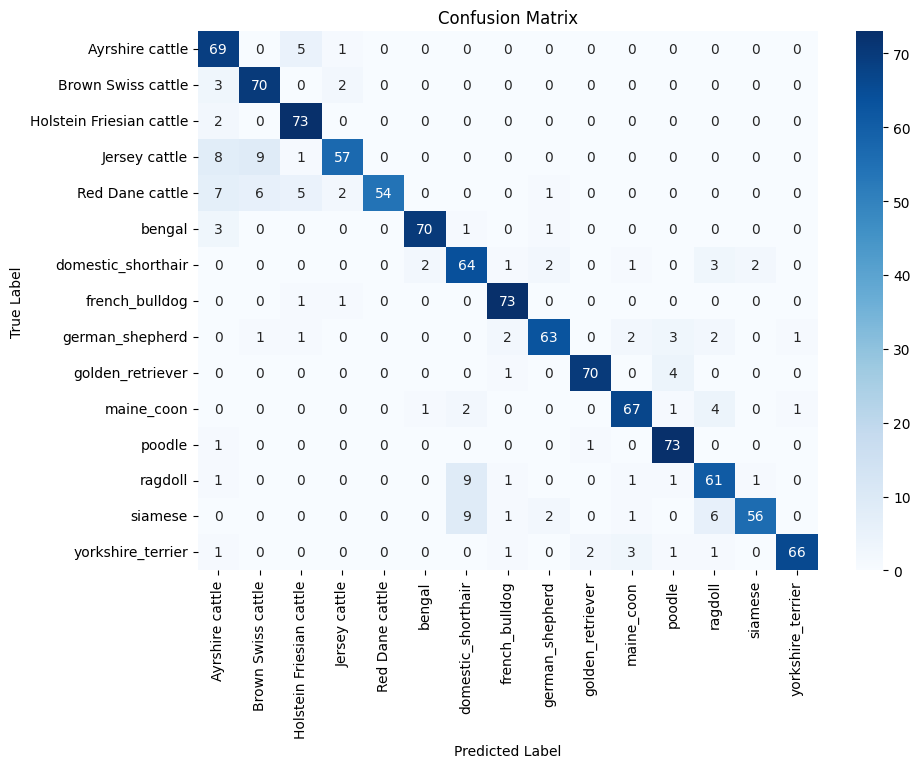

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  # Import necessary functions

# Generate Predictions
predictions = model2.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
# print("Confusion Matrix:")
# print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [14]:
# Print Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

Classification Report:
                          precision    recall  f1-score   support

         Ayrshire cattle       0.73      0.92      0.81        75
      Brown Swiss cattle       0.81      0.93      0.87        75
Holstein Friesian cattle       0.85      0.97      0.91        75
           Jersey cattle       0.90      0.76      0.83        75
         Red Dane cattle       1.00      0.72      0.84        75
                  bengal       0.96      0.93      0.95        75
      domestic_shorthair       0.75      0.85      0.80        75
          french_bulldog       0.91      0.97      0.94        75
         german_shepherd       0.91      0.84      0.88        75
        golden_retriever       0.96      0.93      0.95        75
              maine_coon       0.89      0.88      0.89        76
                  poodle       0.88      0.97      0.92        75
                 ragdoll       0.79      0.81      0.80        75
                 siamese       0.95      0.75      0

In [16]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Extract overall metrics
precision = class_report['weighted avg']['precision']
recall = class_report['weighted avg']['recall']
f1_score = class_report['weighted avg']['f1-score']
support = class_report['weighted avg']['support']

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print results
print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")
print(f"Overall F1-Score: {f1_score:.2f}")
print(f"Support: {support}")
print(f"Accuracy: {accuracy:.2f}")


Overall Precision: 0.89
Overall Recall: 0.88
Overall F1-Score: 0.88
Support: 1126.0
Accuracy: 0.88


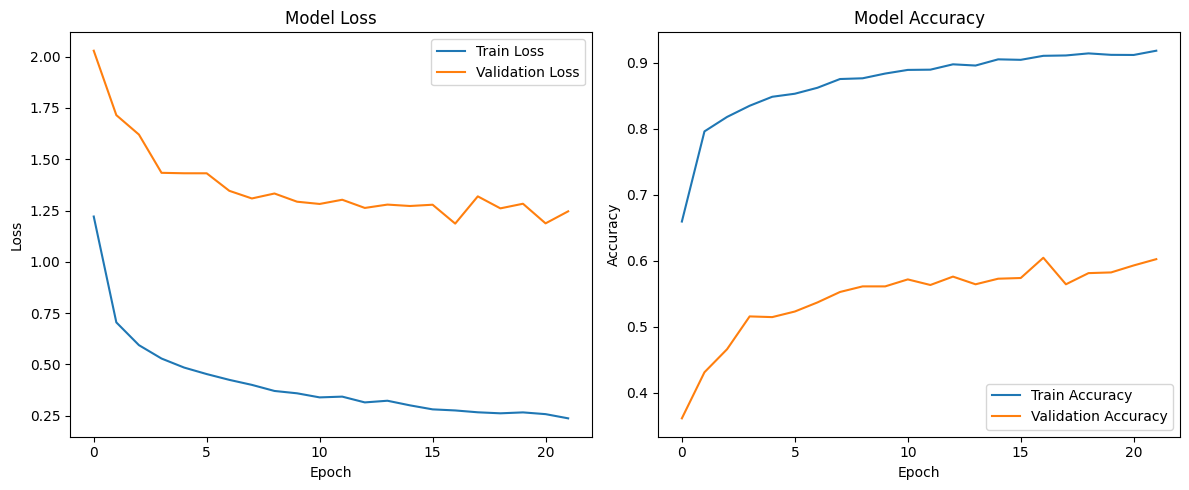

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout() 
plt.show()


# for 50 epoch

In [58]:
history2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    # callbacks=[checkpoint, early_stop],
    verbose=1
)


Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


170/170 ━━━━━━━━━━━━━━━━━━━━ 865s 5s/step - accuracy: 0.5039 - loss: 1.6805 - val_accuracy: 0.3566 - val_loss: 2.1180
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.7849 - loss: 0.7558 - val_accuracy: 0.4201 - val_loss: 1.7788
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8136 - loss: 0.6166 - val_accuracy: 0.4720 - val_loss: 1.6126
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.8405 - loss: 0.5292 - val_accuracy: 0.5069 - val_loss: 1.4806
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.8425 - loss: 0.5064 - val_accuracy: 0.5164 - val_loss: 1.4338
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8609 - loss: 0.4334 - val_accuracy: 0.5185 - val_loss: 1.4210
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.8549 - loss: 0.4481 - val_accuracy: 0.5302 - val_loss: 1.4025
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.8734 - loss: 0.4036 - val_accuracy: 0.550

In [59]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

 

36/36 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9034 - loss: 0.3310
Test Accuracy: 0.8979


In [60]:
# Save the final model
model.save('vgg16_animal_classification_final3.h5')

In [61]:
from tensorflow.keras.models import load_model

# Load the model
model3 = load_model('vgg16_animal_classification_final3.h5')  # or 'best_model.h5' if saved in h5 format


In [62]:
# Evaluate the model on the test set
test_loss, test_accuracy = model3.evaluate(test_generator, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9034 - loss: 0.3310
Test Loss: 0.35077735781669617
Test Accuracy: 0.8978685736656189


36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step


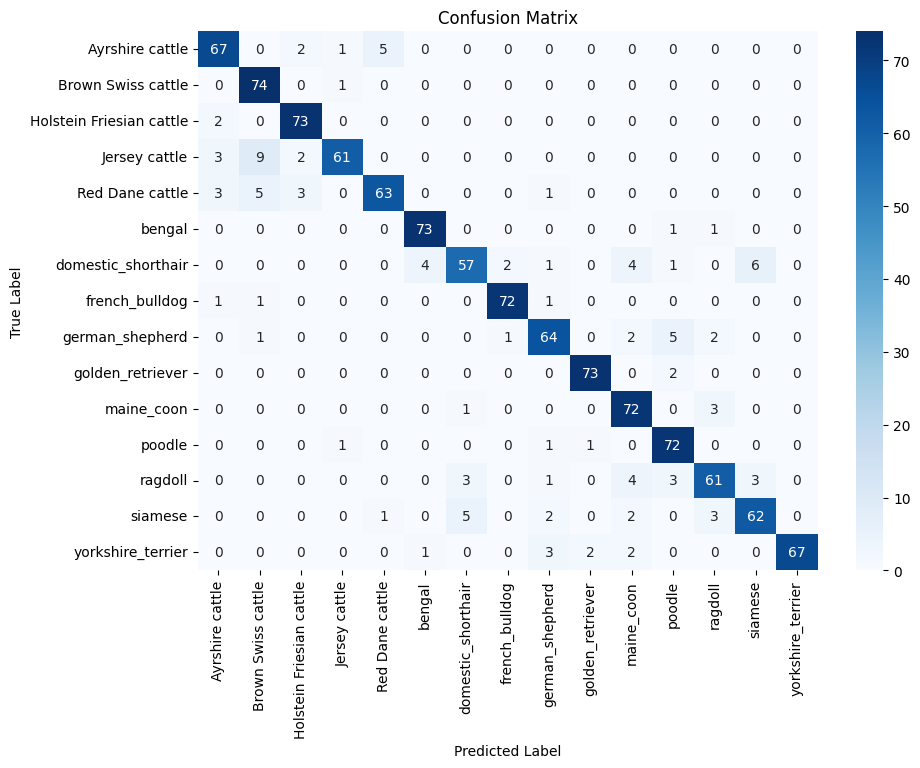

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  # Import necessary functions

# Generate Predictions
predictions = model3.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
# print("Confusion Matrix:")
# print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [64]:
# Print Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

Classification Report:
                          precision    recall  f1-score   support

         Ayrshire cattle       0.88      0.89      0.89        75
      Brown Swiss cattle       0.82      0.99      0.90        75
Holstein Friesian cattle       0.91      0.97      0.94        75
           Jersey cattle       0.95      0.81      0.88        75
         Red Dane cattle       0.91      0.84      0.88        75
                  bengal       0.94      0.97      0.95        75
      domestic_shorthair       0.86      0.76      0.81        75
          french_bulldog       0.96      0.96      0.96        75
         german_shepherd       0.86      0.85      0.86        75
        golden_retriever       0.96      0.97      0.97        75
              maine_coon       0.84      0.95      0.89        76
                  poodle       0.86      0.96      0.91        75
                 ragdoll       0.87      0.81      0.84        75
                 siamese       0.87      0.83      0

In [65]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Extract overall metrics
precision = class_report['weighted avg']['precision']
recall = class_report['weighted avg']['recall']
f1_score = class_report['weighted avg']['f1-score']
support = class_report['weighted avg']['support']

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)


# Print results
print(f"Overall Precision: {precision:.2f}")
print(f"Overall Recall: {recall:.2f}")
print(f"Overall F1-Score: {f1_score:.2f}")
print(f"Support: {support}")
print(f"Accuracy: {accuracy:.2f}")


Overall Precision: 0.90
Overall Recall: 0.90
Overall F1-Score: 0.90
Support: 1126.0
Accuracy: 0.90


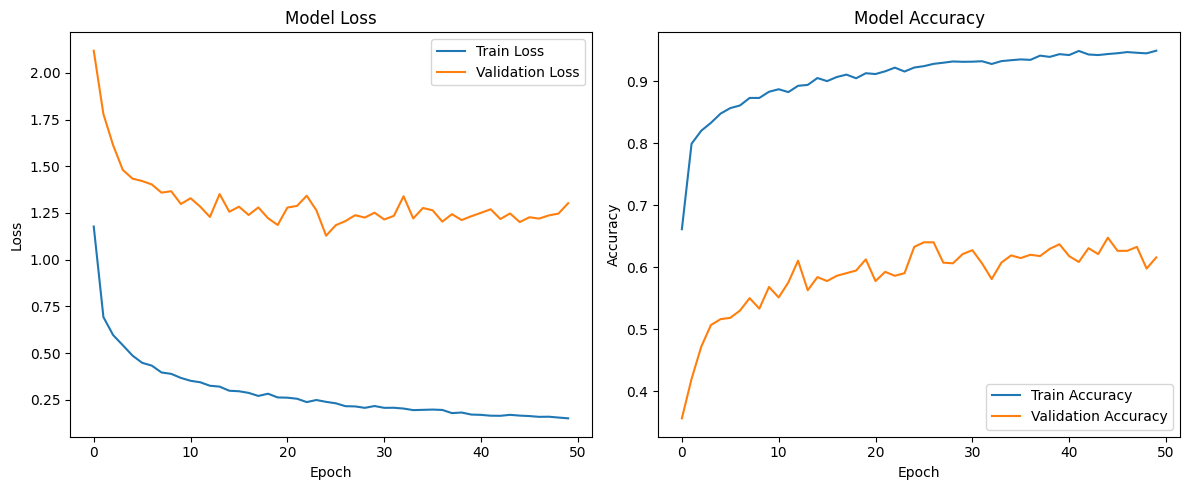

In [66]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout() 
plt.show()


In [3]:
##LOAD THE MODEL
import tensorflow as tf

model = tf.keras.models.load_model('D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/vgg16_animal_classification_final3.h5')

In [7]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load and preprocess the image
image_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/tiger.jpeg'
image = Image.open(image_path).resize((224, 224))  # Resize image to model's expected size

# Convert the image to a NumPy array and normalize it
image_array = np.array(image) / 255.0 
image_array = np.expand_dims(image_array, axis=0)

# Make prediction
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Predicted class: 5


In [8]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load and preprocess the image
image_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/british.jpeg'
image = Image.open(image_path).resize((224, 224))  # Resize image to model's expected size

# Convert the image to a NumPy array and normalize it
image_array = np.array(image) / 255.0 
image_array = np.expand_dims(image_array, axis=0)

# Make prediction
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted class: 6


In [9]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load and preprocess the image
image_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/bengal.jpg'
image = Image.open(image_path).resize((224, 224))  # Resize image to model's expected size

# Convert the image to a NumPy array and normalize it
image_array = np.array(image) / 255.0 
image_array = np.expand_dims(image_array, axis=0)

# Make prediction
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted class: 5


In [11]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the model
model = tf.keras.models.load_model('D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/vgg16_animal_classification_final3.h5')

# Load and preprocess the image
image_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/tiger.jpeg'
image = Image.open(image_path).resize((224, 224))  # Adjust size based on model input requirements

# Convert the image to a NumPy array and normalize it
image_array = np.array(image) / 255.0  # Normalize to [0, 1] range
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Make prediction
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted class: 5


In [12]:
import tensorflow as tf
print(tf.__version__)


2.17.0


# Pipeline

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define Image Dimensions and Model Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # VGG16 expects 224x224 images
BATCH_SIZE = 32
NUM_CLASSES = 15  # Number of classes for classification

# 1. Data Loading and Preprocessing
train_data_dir = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/train' # Update with actual path
test_data_dir = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/test'    # Update with actual path

# Image Data Generators with normalization and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing the images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation

# Loading Data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 2. Model Setup (VGG16 Base + Custom Layers for 15 Classes)
# Load the VGG16 model with pretrained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model's layers to retain pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer for 15 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# 3. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





Found 6375 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [7]:
# 4. Training and Evaluation
# Callbacks for saving the best model and early stopping
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Correcting the fit method by removing 'test_data' if it was passed mistakenly
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=test_generator,  # Only 'validation_data' is needed
    validation_steps=test_generator.samples // BATCH_SIZE,
    epochs=50,
    # callbacks=[checkpoint, early_stopping]
)


Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.5594 - loss: 1.7814 - val_accuracy: 0.7804 - val_loss: 0.6627
Epoch 2/50
  1/199 ━━━━━━━━━━━━━━━━━━━━ 5:15 2s/step - accuracy: 0.7188 - loss: 0.9545

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7188 - loss: 0.9545 - val_accuracy: 0.5000 - val_loss: 0.9975
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7910 - loss: 0.6378 - val_accuracy: 0.8259 - val_loss: 0.5230
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.4457 - val_accuracy: 0.8333 - val_loss: 0.8881
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8195 - loss: 0.5613 - val_accuracy: 0.8330 - val_loss: 0.5068
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2752 - val_accuracy: 0.8333 - val_loss: 0.5149
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8386 - loss: 0.4927 - val_accuracy: 0.8304 - val_loss: 0.4999
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.7228 - val_accuracy: 1.0000 - val_loss: 0.2023
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.8548 - loss: 0.4243 - val_accuracy: 0.8429 - 

In [11]:
# Save the entire model after training
model.save('animal_breed_classification_modelpipeline.h5')


In [13]:
from tensorflow.keras.models import load_model

# Load the model
model4 = load_model('animal_breed_classification_modelpipeline.h5')  # or 'best_model.h5' if saved in h5 format


In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate(test_generator, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.8875 - loss: 0.3725
Test Loss: 0.37161287665367126
Test Accuracy: 0.8818827867507935


In [8]:
# 5. Inference Function for New Images
def predict_breed(image_path, model):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)

    # Predict breed
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    class_label = list(train_generator.class_indices.keys())[class_index]
    
    return class_label

36/36 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


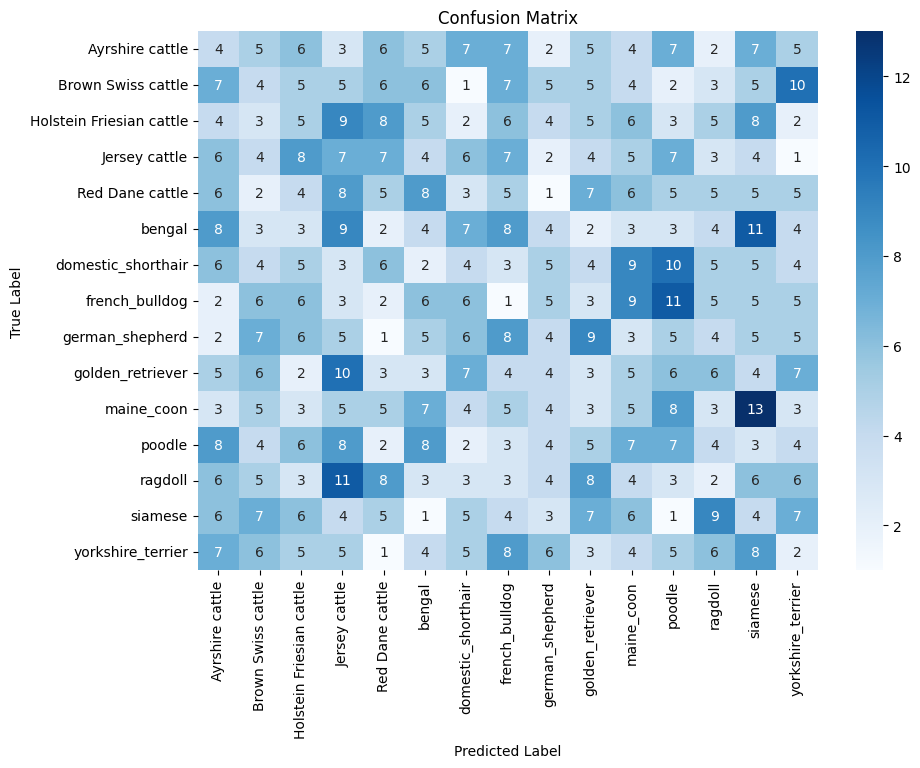

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  # Import necessary functions

# Generate Predictions
predictions = model4.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
# print("Confusion Matrix:")
# print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

IMG_HEIGHT, IMG_WIDTH = 224, 224  # Same as the training dimensions

# Function to preprocess and predict a single image
def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Reshape it for the model: (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image (same as the training rescale)
    img_array /= 255.0
    
    # Make prediction
    predictions = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions) * 100
    
    return predicted_class[0], confidence

# Example usage
img_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/tiger.jpeg'
predicted_class, confidence = predict_image(img_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predicted Class: 6, Confidence: 59.91%


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

IMG_HEIGHT, IMG_WIDTH = 224, 224  # Same as the training dimensions

# Function to preprocess and predict a single image
def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    
    # Convert the image to array
    img_array = image.img_to_array(img)
    
    # Reshape it for the model: (1, IMG_HEIGHT, IMG_WIDTH, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image (same as the training rescale)
    img_array /= 255.0
    
    # Make prediction
    predictions = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions) * 100
    
    return predicted_class[0], confidence

# Example usage
img_path = 'D:/3rd year/1st sem/Deep Learning/Project/AnimalBreed/british.jpeg'
predicted_class, confidence = predict_image(img_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: 6, Confidence: 99.81%
